In [1]:
from math import prod

import matplotlib.pyplot as plt
import numpy as np

Boilerplate to load the mask into a `16x1040` array. I assume the input counts from 0.

In [2]:
PATH = "/Users/peppedilillo/Library/CloudStorage/Dropbox/Progetti/masks/data/WFM1.5Dcode_16901.txt"

def mask_from_file(filename):
    with open(filename, "r") as f:
        lines = f.readlines()
    #return [*filter(lambda n: n < np.prod(mask_size), map(lambda s: int(s.strip()), lines))]
    return [*map(lambda s: int(s.strip()), lines)]

def get_mask():
    mask_size = (16, 1040)
    holes_list = [*filter(lambda n: n < prod(mask_size), mask_from_file(PATH))]
    array = np.zeros(shape=(np.prod(mask_size)))
    array[holes_list] = 1 # holes are defined ones
    return array.reshape(mask_size)


mask = get_mask()
print(mask)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


We use [`skimage.measure`](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) for clustering. This is the output on a test array:

In [20]:
from skimage.measure import label

test_array = np.array([
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 1, 0],
    [0, 0, 0, 0],
])
label(test_array, connectivity=1, background=0)

array([[1, 1, 0, 2],
       [0, 1, 0, 0],
       [0, 0, 3, 0],
       [4, 0, 3, 0],
       [0, 0, 0, 0]])

To get the number of cluster we histogram and count non-zero, non unique labels.

In [22]:
counts, bins = np.histogram(label(test_array, connectivity=1, background=0), bins=np.arange(1, test_array.sum()))
print(f"hist counts: {counts}; hist bins: {bins}")
print(f"cluster number: {counts[counts > 1].size}")

hist counts: [3 1 2 1 0]; hist bins: [1 2 3 4 5 6]
cluster number: 2


In [6]:
def count_clusters(mask):
    labelled = label(mask, connectivity=1, background=0)
    cs, _ = np.histogram(labelled, bins=np.arange(1, labelled.max() + 2))
    return cs[cs > 1].size

Finally we map cluster count over all cyclic columns permutations. Let's test over the test array:

In [8]:
_, max_perm = test_array.shape
cluster_counts = [*map(lambda p: count_clusters(np.roll(test_array, p, axis=1)), range(max_perm))]
cluster_counts

[2, 2, 2, 3]

In [9]:
_, max_perm = mask.shape
cluster_counts = [*map(lambda p: count_clusters(np.roll(mask, p, axis=1)), range(max_perm))]
cluster_counts

[825,
 825,
 825,
 825,
 825,
 823,
 825,
 825,
 824,
 824,
 825,
 825,
 825,
 825,
 825,
 825,
 826,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 824,
 825,
 825,
 824,
 824,
 825,
 825,
 825,
 824,
 826,
 826,
 826,
 825,
 825,
 825,
 825,
 823,
 825,
 826,
 826,
 826,
 825,
 824,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 825,
 824,
 825,
 826,
 825,
 825,
 826,
 826,
 825,
 824,
 825,
 825,
 825,
 824,
 825,
 824,
 826,
 826,
 825,
 823,
 825,
 825,
 825,
 825,
 825,
 826,
 826,
 826,
 827,
 826,
 825,
 824,
 825,
 826,
 826,
 825,
 824,
 825,
 825,
 825,
 823,
 825,
 824,
 825,
 825,
 825,
 825,
 825,
 824,
 825,
 825,
 825,
 824,
 825,
 825,
 825,
 824,
 825,
 826,
 824,
 825,
 825,
 825,
 825,
 825,
 826,
 824,
 825,
 825,
 825,
 826,
 824,
 825,
 826,
 825,
 826,
 825,
 825,
 824,
 825,
 825,
 825,
 824,
 825,
 825,
 826,
 825,
 825,
 825,
 825,
 824,
 826,
 825,
 824,
 825,
 827,
 825,
 826,
 825,
 825,
 825,
 825,
 825,
 825

In [10]:
mask.shape

(16, 1040)

Text(0.5, 0, 'Permutation index')

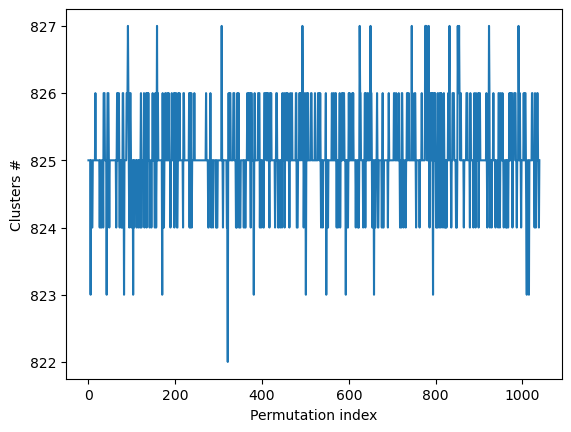

In [14]:
plt.plot(cluster_counts)
plt.ylabel("Clusters #")
plt.xlabel("Permutation index")

These are the permutation indeces at which the maximum cluster count is observed:

In [18]:
np.argwhere(np.array(cluster_counts) == max(cluster_counts))

array([[ 91],
       [158],
       [307],
       [493],
       [625],
       [650],
       [745],
       [776],
       [777],
       [779],
       [784],
       [832],
       [851],
       [854],
       [923],
       [991]])

However the difference is small:

In [19]:
max(cluster_counts) - min(cluster_counts)

5